In [25]:
# !pip install folium

In [26]:
## cargar el dataset
import numpy as np
import pandas as pd

df_restaurants = pd.read_csv('./data/restaurants.csv', delimiter=',', decimal='.', encoding='UTF-8')
df_restaurants.head()

,id,name,tag,x,y,district,IDDIST,direction,stars,n_reviews,min_price,max_price,platform
0,71036,Restaurante Statera,$$$$||Peruana||contemporánea||Opciones sin glu...,-12.115658,-77.043440,MIRAFLORES,150122,"Avenida Mariscal La Mar 463, Miraflores, Lima ...",50,130,80.0,280.0,tripadvisor
1,72471,Maras Restaurante,$$$$||Peruana||Latina||Internacional||,-12.092106,-77.024660,SAN ISIDRO,150131,Amador Merino Reyna 551 Esquina Calle Begonias...,45,675,158.0,237.0,tripadvisor
2,29667,Ventarrón Restaurante Chiclayano & Barra,$$ - $$$||Peruana||Mariscos||Gastropub||,-12.149373,-77.020706,BARRANCO,150104,"Avenida Grau 276 Frente al Parque Municipal, L...",45,304,12.0,72.0,tripadvisor
3,144186,Aji 555 Real Thai Cuisine,$$ - $$$||Asiática||Tailandesa||Apto para vege...,-12.105918,-76.992340,SAN BORJA,150130,"Av. San Luis 2879 San Borja, Lima 41 Perú",45,361,20.0,83.0,tripadvisor
4,124291,Cebicheria La Mar,$$ - $$$||Peruana||Latina||Mariscos||,-12.113314,-77.045400,MIRAFLORES,150122,"Av. La Mar 770 Miraflores, Lima Perú",45,4864,79.0,99.0,tripadvisor


In [27]:
df_restaurants.shape
cnt_total_inst2 = df_restaurants.shape[0]
print(cnt_total_inst2)

9871


In [29]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9871 non-null   int64  
 1   name       9871 non-null   object 
 2   tag        9871 non-null   object 
 3   x          9871 non-null   float64
 4   y          9871 non-null   float64
 5   district   9871 non-null   object 
 6   IDDIST     9871 non-null   object 
 7   direction  9871 non-null   object 
 8   stars      9871 non-null   int64  
 9   n_reviews  9871 non-null   int64  
 10  min_price  9870 non-null   object 
 11  max_price  9870 non-null   object 
 12  platform   9871 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1002.7+ KB


In [48]:
## valores nulos en el dataset
df_restaurants_no_nulos = df_restaurants.dropna(how='all')
cnt_inst_nonulas2 = df_restaurants_no_nulos.shape[0]

cnt_inst_nulas2 = cnt_total_inst2 - cnt_inst_nonulas2
print(cnt_inst_nulas2)

0


platform
googleplaces    8155
tripadvisor     1716
Name: count, dtype: int64


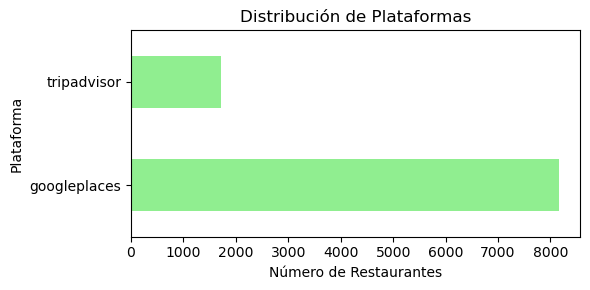

In [30]:
import matplotlib.pyplot as plt

# Obtener el conteo de valores de la columna 'platform'
valores = df_restaurants['platform'].value_counts()
print(valores)
# Crear un gráfico de barras horizontales
plt.figure(figsize=(6, 3))
valores.plot(kind='barh', color='lightgreen')

# Añadir título y etiquetas de los ejes
plt.title('Distribución de Plataformas')
plt.xlabel('Número de Restaurantes')
plt.ylabel('Plataforma')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

min_price
         9355
20.0       55
39.0       52
12.0       36
10.0       35
5.0        35
8.0        25
16.0       23
59.0       22
79.0       19
15.0       19
30.0       16
4.0        14
7.0        14
99.0       13
32.0       12
6.0        12
28.0       12
3.0        12
24.0       11
9.0         8
13.0        7
2.0         7
19.0        6
14.0        5
18.0        5
25.0        4
22.0        4
118.0       3
35.0        3
40.0        3
36.0        3
47.0        2
17.0        2
80.0        2
158.0       2
197.0       2
51.0        1
91.0        1
111.0       1
34.0        1
50.0        1
178.0       1
27.0        1
150.0       1
130.0       1
126.0       1
Name: count, dtype: int64


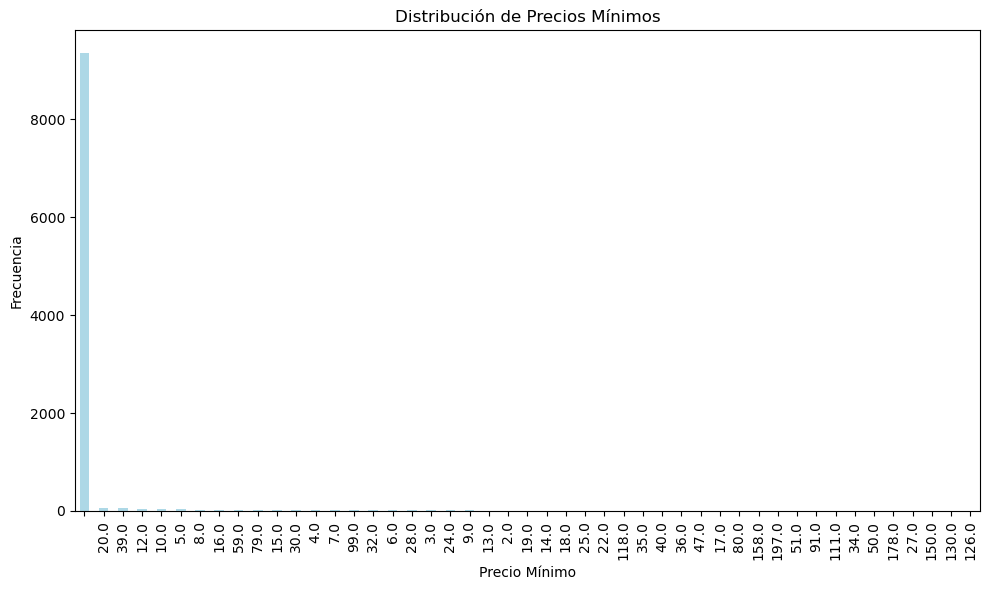

In [31]:
import matplotlib.pyplot as plt

# Obtener el conteo de valores de la columna 'min_price'
valoresmin = df_restaurants['min_price'].value_counts()
print(valoresmin)

# Crear un gráfico de barras verticales
plt.figure(figsize=(10, 6))
valoresmin.plot(kind='bar', color='lightblue')

# Añadir título y etiquetas de los ejes
plt.title('Distribución de Precios Mínimos')
plt.xlabel('Precio Mínimo')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
#  plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()

max_price
         9355
59.0       40
79.0       39
99.0       27
30.0       26
         ... 
435.0       1
86.0        1
42.0        1
52.0        1
71.0        1
Name: count, Length: 93, dtype: int64


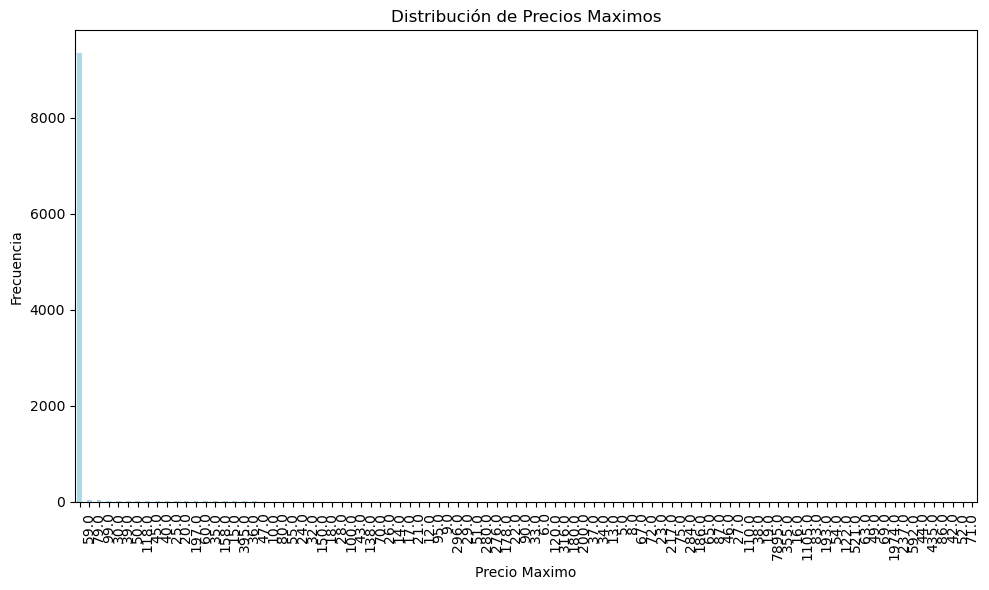

In [32]:
import matplotlib.pyplot as plt

# Obtener el conteo de valores de la columna 'min_price'
valoresmax = df_restaurants['max_price'].value_counts()
print(valoresmax)

# Crear un gráfico de barras verticales
plt.figure(figsize=(10, 6))
valoresmax.plot(kind='bar', color='lightblue')

# Añadir título y etiquetas de los ejes
plt.title('Distribución de Precios Maximos')
plt.xlabel('Precio Maximo')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
#  plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()

In [33]:
valoresd = df_restaurants['district'].value_counts()
print(valoresd)

district
                           1082
MIRAFLORES                  602
LIMA                        423
SANTIAGO DE SURCO           411
COMAS                       349
LOS OLIVOS                  321
SAN ISIDRO                  320
CHORRILLOS                  303
JESUS MARIA                 296
ATE                         294
SAN JUAN DE MIRAFLORES      270
SURQUILLO                   268
VILLA EL SALVADOR           268
LINCE                       259
SAN BORJA                   253
CARABAYLLO                  251
BARRANCO                    248
SAN MIGUEL                  245
LA MOLINA                   242
VILLA MARIA DEL TRIUNFO     241
LA VICTORIA                 236
PUENTE PIEDRA               229
PUEBLO LIBRE                222
BREÑA                       207
INDEPENDENCIA               207
LURIN                       198
EL AGUSTINO                 189
MAGDALENA DEL MAR           187
SAN JUAN DE LURIGANCHO      183
CIENEGUILLA                 149
LURIGANCHO                  145

In [34]:
valoresiddist = df_restaurants['IDDIST'].value_counts()
print(valoresiddist)

IDDIST
Out       1082
150122     602
150101     423
150140     411
150110     349
150117     321
150131     320
150108     303
150113     296
150103     294
150133     270
150141     268
150142     268
150116     259
150130     253
150106     251
150104     248
150136     245
150114     242
150143     241
150115     236
150125     229
150121     222
150105     207
150112     207
150119     198
150111     189
150120     187
150132     183
150109     149
150118     145
150107     125
150102     123
150129     107
150123     104
150135      92
150134      67
150124      43
150137      38
150128      34
150126      17
150138       9
150139       8
150127       6
Name: count, dtype: int64


In [35]:
valoresx = df_restaurants['x'].value_counts()
print(valoresx)

x
-12.050849    5
-12.085023    5
-12.026638    5
-12.141555    5
-12.049141    4
             ..
-12.134744    1
-12.155637    1
-12.151171    1
-12.180329    1
-12.140495    1
Name: count, Length: 9674, dtype: int64


In [36]:
valoresy = df_restaurants['y'].value_counts()
print(valoresy)

y
-77.125984    6
-76.987779    5
-76.978390    5
-77.020337    5
-77.037960    4
             ..
-77.071232    1
-77.061214    1
-77.058865    1
-77.051150    1
-76.998362    1
Name: count, Length: 9572, dtype: int64


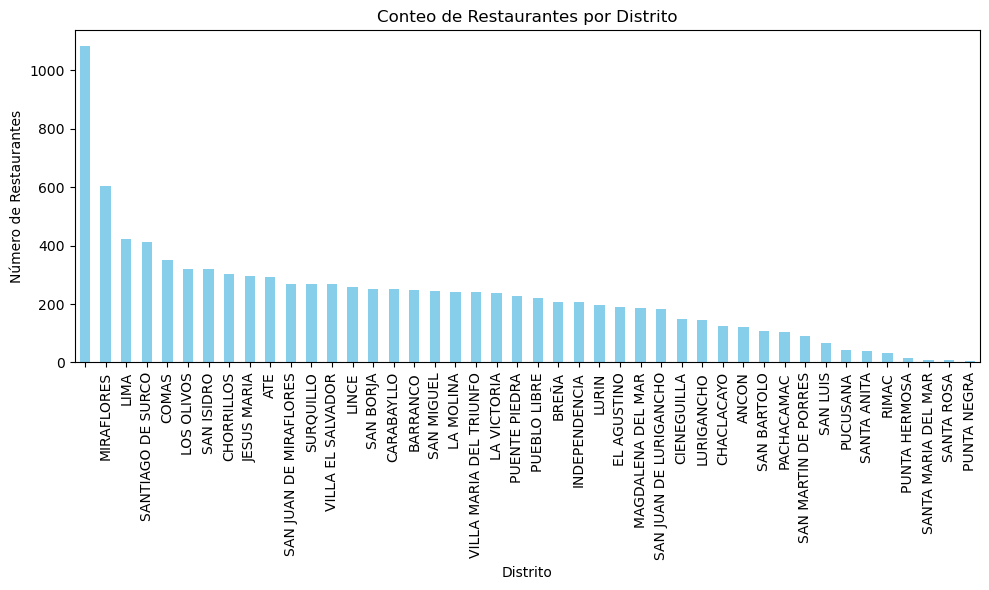

In [38]:
import matplotlib.pyplot as plt

# Obtener el conteo de valores de la columna 'district'
valoresd = df_restaurants['district'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
valoresd.plot(kind='bar', color='skyblue')

# Personalizar el gráfico
plt.title('Conteo de Restaurantes por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de Restaurantes')
# plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en las coordenadas iniciales
mapa_restaurants = folium.Map(location=[df_restaurants['x'].mean(), df_restaurants['y'].mean()], zoom_start=12)

# Convertir las coordenadas en una lista de listas
coordenadas_restaurants = df_restaurants[['x', 'y']].values.tolist()

# Crear el mapa de calor y añadirlo al mapa
mapa_restaurants.add_child(HeatMap(coordenadas_restaurants, radius=15))

# Guardar el mapa como un archivo HTML
mapa_restaurants.save("mapa_restaurants.html")

# Mostrar el mapa
mapa_restaurants

In [46]:
df_restaurants['stars'].describe()

count    9871.000000
mean       41.632155
std         5.863418
min        10.000000
25%        40.000000
50%        42.000000
75%        45.000000
max        50.000000
Name: stars, dtype: float64

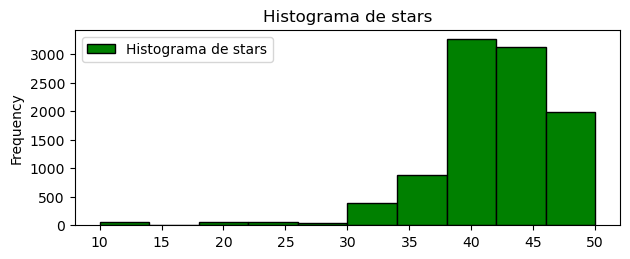

In [45]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,8))

plt.subplot(211)
df_restaurants['stars'].plot.hist(bins=10, color='green', label='Histograma de stars', edgecolor='black')
plt.legend(loc='best')
plt.title('Histograma de stars')

plt.tight_layout()

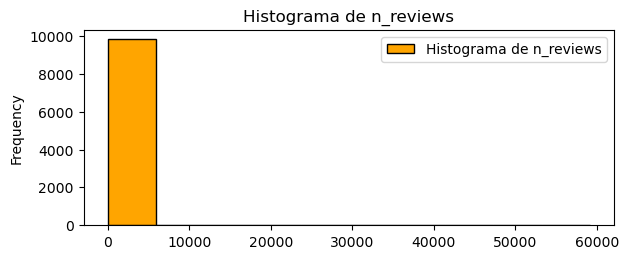

In [47]:
plt.subplot(212)
df_restaurants['n_reviews'].plot.hist(bins=10, color='orange', label='Histograma de n_reviews', edgecolor='black')
plt.legend(loc='best')
plt.title('Histograma de n_reviews')
plt.tight_layout()

In [49]:
valoresn = df_restaurants['name'].value_counts()
print(valoresn)

name
Norky's                      52
KFC                          50
Pizza Hut                    47
Bembos                       43
McDonald's                   28
                             ..
Chifa ceos                    1
Pizzeria BAMBINO              1
El Huarique Lomito Rayado     1
FRUITSM&J PERÚ                1
Restaurante D'Carlos          1
Name: count, Length: 8867, dtype: int64


In [58]:
valorest = df_restaurants['tag'].value_counts()
print(valorest)

tag
Restaurante                                        5097
Restaurante peruano                                 562
Pizzería                                            258
                                                    251
Restaurante especializado en pollo                  237
                                                   ... 
$$ - $$$||Peruana||Mariscos||Pub||                    1
$||Mexicana||Comida rápida||Del Medio Oriente||       1
$$ - $$$||Café||Argentina||Sudamericana||             1
$$ - $$$||Japonesa||Peruana||Internacional||          1
Jamonería                                             1
Name: count, Length: 760, dtype: int64


In [67]:
df_restaurants2 = df_restaurants.copy()

def limpiar_texto(texto):
    texto_limpio = re.sub(r'-+|\$+', '', texto)
    return texto_limpio

def contar_simbolos(cadena):
    return cadena.count('|')

df_restaurants2['cnt_simbolos'] = df_restaurants2['tag'].apply(contar_simbolos)
df_restaurants2.head()

,id,name,tag,x,y,district,IDDIST,direction,stars,n_reviews,min_price,max_price,platform,cnt_simbolos
0,71036,Restaurante Statera,$$$$||Peruana||contemporánea||Opciones sin glu...,-12.115658,-77.043440,MIRAFLORES,150122,"Avenida Mariscal La Mar 463, Miraflores, Lima ...",50,130,80.0,280.0,tripadvisor,8
1,72471,Maras Restaurante,$$$$||Peruana||Latina||Internacional||,-12.092106,-77.024660,SAN ISIDRO,150131,Amador Merino Reyna 551 Esquina Calle Begonias...,45,675,158.0,237.0,tripadvisor,8
2,29667,Ventarrón Restaurante Chiclayano & Barra,$$ - $$$||Peruana||Mariscos||Gastropub||,-12.149373,-77.020706,BARRANCO,150104,"Avenida Grau 276 Frente al Parque Municipal, L...",45,304,12.0,72.0,tripadvisor,8
3,144186,Aji 555 Real Thai Cuisine,$$ - $$$||Asiática||Tailandesa||Apto para vege...,-12.105918,-76.992340,SAN BORJA,150130,"Av. San Luis 2879 San Borja, Lima 41 Perú",45,361,20.0,83.0,tripadvisor,8
4,124291,Cebicheria La Mar,$$ - $$$||Peruana||Latina||Mariscos||,-12.113314,-77.045400,MIRAFLORES,150122,"Av. La Mar 770 Miraflores, Lima Perú",45,4864,79.0,99.0,tripadvisor,8


In [68]:
valorescsim = df_restaurants2['cnt_simbolos'].value_counts()
print(valorescsim)

cnt_simbolos
0    8321
8     732
6     372
4     270
2     176
Name: count, dtype: int64


In [69]:
df_restaurants2.head()

,id,name,tag,x,y,district,IDDIST,direction,stars,n_reviews,min_price,max_price,platform,cnt_simbolos
0,71036,Restaurante Statera,$$$$||Peruana||contemporánea||Opciones sin glu...,-12.115658,-77.043440,MIRAFLORES,150122,"Avenida Mariscal La Mar 463, Miraflores, Lima ...",50,130,80.0,280.0,tripadvisor,8
1,72471,Maras Restaurante,$$$$||Peruana||Latina||Internacional||,-12.092106,-77.024660,SAN ISIDRO,150131,Amador Merino Reyna 551 Esquina Calle Begonias...,45,675,158.0,237.0,tripadvisor,8
2,29667,Ventarrón Restaurante Chiclayano & Barra,$$ - $$$||Peruana||Mariscos||Gastropub||,-12.149373,-77.020706,BARRANCO,150104,"Avenida Grau 276 Frente al Parque Municipal, L...",45,304,12.0,72.0,tripadvisor,8
3,144186,Aji 555 Real Thai Cuisine,$$ - $$$||Asiática||Tailandesa||Apto para vege...,-12.105918,-76.992340,SAN BORJA,150130,"Av. San Luis 2879 San Borja, Lima 41 Perú",45,361,20.0,83.0,tripadvisor,8
4,124291,Cebicheria La Mar,$$ - $$$||Peruana||Latina||Mariscos||,-12.113314,-77.045400,MIRAFLORES,150122,"Av. La Mar 770 Miraflores, Lima Perú",45,4864,79.0,99.0,tripadvisor,8


In [70]:
import re
import spacy
from collections import Counter

nlp = spacy.load("es_core_news_sm")  # Para español

def limpiar_texto(texto):
    texto_limpio = re.sub(r'-+|\$+', '', texto)
    return texto_limpio

def procesar_entidades(texto):
    texto_limpio = limpiar_texto(texto) 
    documentos = texto_limpio.split("||")

    documentos = [documento.strip() for documento in documentos if documento.strip()]
    
    resultados = []  # Lista para almacenar los resultados

    for documento in documentos:
        doc = nlp(documento)
        entidades_documento = []  # Lista para las entidades de cada documento

        etiqueta = ""
        for entidad in doc.ents:
            etiqueta = entidad.label_
        
        entidades_documento.append((documento, etiqueta))
        
        resultados.extend(entidades_documento)
    return resultados

df_restaurants2['tag_lista'] = df_restaurants2['tag'].apply(procesar_entidades)

df_restaurants2.head()

,id,name,tag,x,y,district,IDDIST,direction,stars,n_reviews,min_price,max_price,platform,cnt_simbolos,tag_lista
0,71036,Restaurante Statera,$$$$||Peruana||contemporánea||Opciones sin glu...,-12.115658,-77.043440,MIRAFLORES,150122,"Avenida Mariscal La Mar 463, Miraflores, Lima ...",50,130,80.0,280.0,tripadvisor,8,"[(Peruana, LOC), (contemporánea, ), (Opciones ..."
1,72471,Maras Restaurante,$$$$||Peruana||Latina||Internacional||,-12.092106,-77.024660,SAN ISIDRO,150131,Amador Merino Reyna 551 Esquina Calle Begonias...,45,675,158.0,237.0,tripadvisor,8,"[(Peruana, LOC), (Latina, ), (Internacional, )]"
2,29667,Ventarrón Restaurante Chiclayano & Barra,$$ - $$$||Peruana||Mariscos||Gastropub||,-12.149373,-77.020706,BARRANCO,150104,"Avenida Grau 276 Frente al Parque Municipal, L...",45,304,12.0,72.0,tripadvisor,8,"[(Peruana, LOC), (Mariscos, LOC), (Gastropub, ..."
3,144186,Aji 555 Real Thai Cuisine,$$ - $$$||Asiática||Tailandesa||Apto para vege...,-12.105918,-76.992340,SAN BORJA,150130,"Av. San Luis 2879 San Borja, Lima 41 Perú",45,361,20.0,83.0,tripadvisor,8,"[(Asiática, LOC), (Tailandesa, PER), (Apto par..."
4,124291,Cebicheria La Mar,$$ - $$$||Peruana||Latina||Mariscos||,-12.113314,-77.045400,MIRAFLORES,150122,"Av. La Mar 770 Miraflores, Lima Perú",45,4864,79.0,99.0,tripadvisor,8,"[(Peruana, LOC), (Latina, ), (Mariscos, LOC)]"


In [71]:
import pandas as pd

def extraer_tags(tag_lista):
    tag_lista = tag_lista + [('', '')] * (3 - len(tag_lista))
    tags = [t[0] for t in tag_lista[:3]]
    tipos = [t[1] if len(t) > 1 else '' for t in tag_lista[:3]]
    
    return pd.Series({
        'tag1': tags[0], 'tag2': tags[1], 'tag3': tags[2],
        'tipo_tag1': tipos[0], 'tipo_tag2': tipos[1], 'tipo_tag3': tipos[2]
    })

nuevas_columnas = df_restaurants2['tag_lista'].apply(extraer_tags)

df_restaurants2 = pd.concat([df_restaurants2, nuevas_columnas], axis=1)

df_restaurants2.head()

,id,name,tag,x,y,district,IDDIST,direction,stars,n_reviews,...,max_price,platform,cnt_simbolos,tag_lista,tag1,tag2,tag3,tipo_tag1,tipo_tag2,tipo_tag3
0,71036,Restaurante Statera,$$$$||Peruana||contemporánea||Opciones sin glu...,-12.115658,-77.043440,MIRAFLORES,150122,"Avenida Mariscal La Mar 463, Miraflores, Lima ...",50,130,...,280.0,tripadvisor,8,"[(Peruana, LOC), (contemporánea, ), (Opciones ...",Peruana,contemporánea,Opciones sin gluten,LOC,,
1,72471,Maras Restaurante,$$$$||Peruana||Latina||Internacional||,-12.092106,-77.024660,SAN ISIDRO,150131,Amador Merino Reyna 551 Esquina Calle Begonias...,45,675,...,237.0,tripadvisor,8,"[(Peruana, LOC), (Latina, ), (Internacional, )]",Peruana,Latina,Internacional,LOC,,
2,29667,Ventarrón Restaurante Chiclayano & Barra,$$ - $$$||Peruana||Mariscos||Gastropub||,-12.149373,-77.020706,BARRANCO,150104,"Avenida Grau 276 Frente al Parque Municipal, L...",45,304,...,72.0,tripadvisor,8,"[(Peruana, LOC), (Mariscos, LOC), (Gastropub, ...",Peruana,Mariscos,Gastropub,LOC,LOC,LOC
3,144186,Aji 555 Real Thai Cuisine,$$ - $$$||Asiática||Tailandesa||Apto para vege...,-12.105918,-76.992340,SAN BORJA,150130,"Av. San Luis 2879 San Borja, Lima 41 Perú",45,361,...,83.0,tripadvisor,8,"[(Asiática, LOC), (Tailandesa, PER), (Apto par...",Asiática,Tailandesa,Apto para vegetarianos,LOC,PER,
4,124291,Cebicheria La Mar,$$ - $$$||Peruana||Latina||Mariscos||,-12.113314,-77.045400,MIRAFLORES,150122,"Av. La Mar 770 Miraflores, Lima Perú",45,4864,...,99.0,tripadvisor,8,"[(Peruana, LOC), (Latina, ), (Mariscos, LOC)]",Peruana,Latina,Mariscos,LOC,,LOC


In [72]:
valorestag1 = df_restaurants2['tag1'].value_counts()
print(valorestag1)

tag1
Restaurante                                5097
Peruana                                     815
Restaurante peruano                         562
                                            323
Pizzería                                    285
                                           ... 
Urbanización                                  1
Brasería                                      1
Oficina de la Administración                  1
Restaurante chino de comida para llevar       1
Jamonería                                     1
Name: count, Length: 235, dtype: int64


In [73]:
df_final = df_restaurants2.copy()

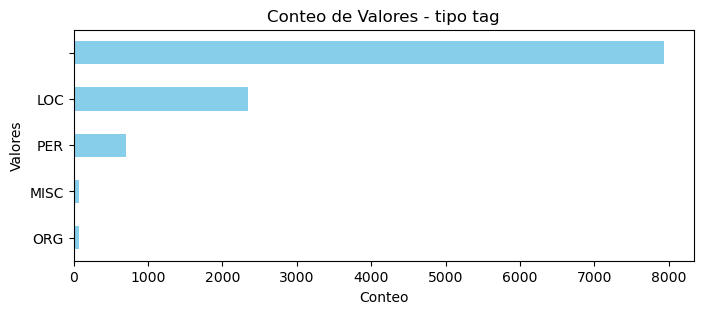

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
# Concatenar las tres columnas en una sola Serie
# Filtrar los valores de tag2 y tag3 que no son nulos ni están en blanco
tipo_tag2_no_nulos = df_final['tipo_tag2'][df_final['tipo_tag2'].notnull() & (df_final['tipo_tag2'] != '')]
tipo_tag3_no_nulos = df_final['tipo_tag3'][df_final['tipo_tag3'].notnull() & (df_final['tipo_tag3'] != '')]

# Concatenar las tres columnas en una sola Serie, solo si tienen datos
tipo_tags_concatenados = pd.concat([df_final['tipo_tag1'], tipo_tag2_no_nulos, tipo_tag3_no_nulos])

# Obtener el conteo de valores
valores_tipo_tags_concat = tipo_tags_concatenados.value_counts()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(8, 3))
valores_tipo_tags_concat.sort_values().plot(kind='barh', color='skyblue')
plt.title('Conteo de Valores - tipo tag')
plt.xlabel('Conteo')
plt.ylabel('Valores')
plt.show()

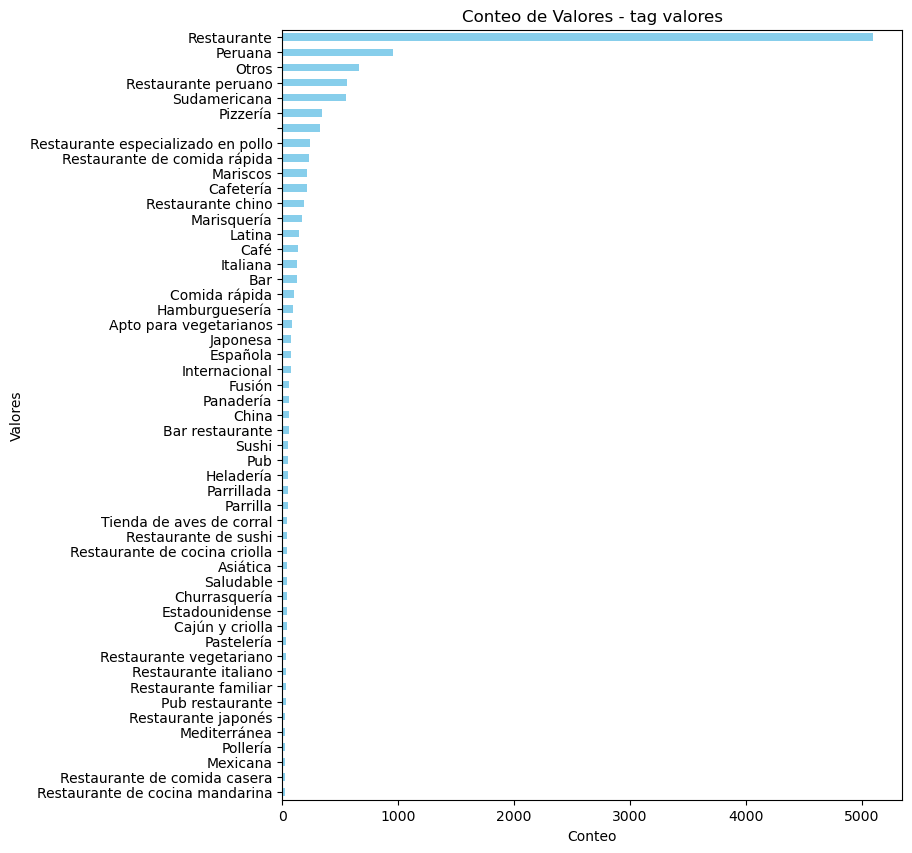

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
# Concatenar las tres columnas en una sola Serie
# Filtrar los valores de tag2 y tag3 que no son nulos ni están en blanco
tag2_no_nulos = df_final['tag2'][df_final['tag2'].notnull() & (df_final['tag2'] != '')]
tag3_no_nulos = df_final['tag3'][df_final['tag3'].notnull() & (df_final['tag3'] != '')]

# Concatenar las tres columnas en una sola Serie, solo si tienen datos
tags_concatenados = pd.concat([df_final['tag1'], tag2_no_nulos, tag3_no_nulos])

# Obtener el conteo de valores
valores_tags_concat = tags_concatenados.value_counts()

top_cat_15 = valores_tags_concat.head(50)

# Imprimir los valores
# print(valores_tags_concat)

# Sumar el resto
otros = valores_tags_concat[50:].sum()
top_cat_15['Otros'] = otros

# Crear el gráfico de barras horizontal
plt.figure(figsize=(8, 10))
top_cat_15.sort_values().plot(kind='barh', color='skyblue')
plt.title('Conteo de Valores - tag valores')
plt.xlabel('Conteo')
plt.ylabel('Valores')
plt.show()

In [76]:
valorestag1 = df_final['tag1'].value_counts()
print(valorestag1)

tag1
Restaurante                                5097
Peruana                                     815
Restaurante peruano                         562
                                            323
Pizzería                                    285
                                           ... 
Urbanización                                  1
Brasería                                      1
Oficina de la Administración                  1
Restaurante chino de comida para llevar       1
Jamonería                                     1
Name: count, Length: 235, dtype: int64


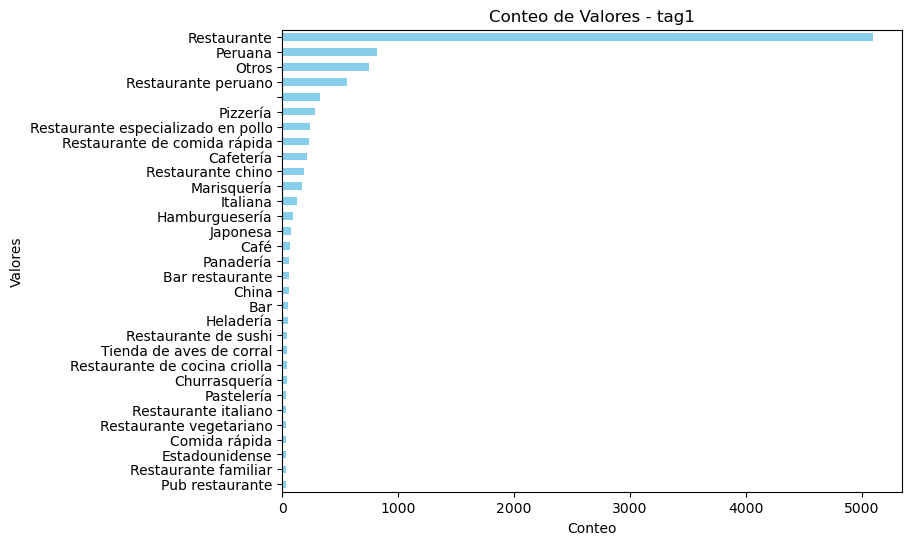

In [77]:
import matplotlib.pyplot as plt

valorestag1 = df_final['tag1'].value_counts()
top_15 = valorestag1.head(30)

otros = valorestag1[30:].sum()
top_15['Otros'] = otros

plt.figure(figsize=(8, 6))
top_15.sort_values().plot(kind='barh', color='skyblue')
plt.title('Conteo de Valores - tag1')
plt.xlabel('Conteo')
plt.ylabel('Valores')
plt.show()

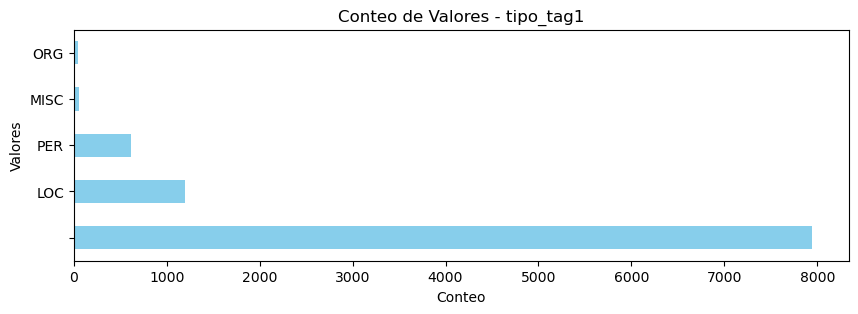

In [78]:
import matplotlib.pyplot as plt

# Obtener los valores de conteo
valorestipotag1 = df_final['tipo_tag1'].value_counts()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 3))
valorestipotag1.plot(kind='barh', color='skyblue')
plt.title('Conteo de Valores - tipo_tag1')
plt.xlabel('Conteo')
plt.ylabel('Valores')
plt.show()

In [79]:
valorestag2 = df_final['tag2'].value_counts()
print(valorestag2)

tag2
                           8649
Sudamericana                303
Mariscos                    146
Peruana                     129
Latina                      120
Bar                          48
Café                         47
Pizzería                     46
Comida rápida                45
Sushi                        36
Internacional                29
Cajún y criolla              28
Parrillada                   27
Apto para vegetarianos       24
Española                     22
Pub                          18
Parrilla                     16
Fusión                       13
Asiática                     12
Saludable                    11
Estadounidense               10
Delicatessen                  8
Mediterránea                  8
contemporánea                 7
Opciones veganas              7
Cantonés                      6
bar cervecero                 4
Gastropub                     4
Comida de calle               3
Francesa                      3
Argentina                     3
Cor

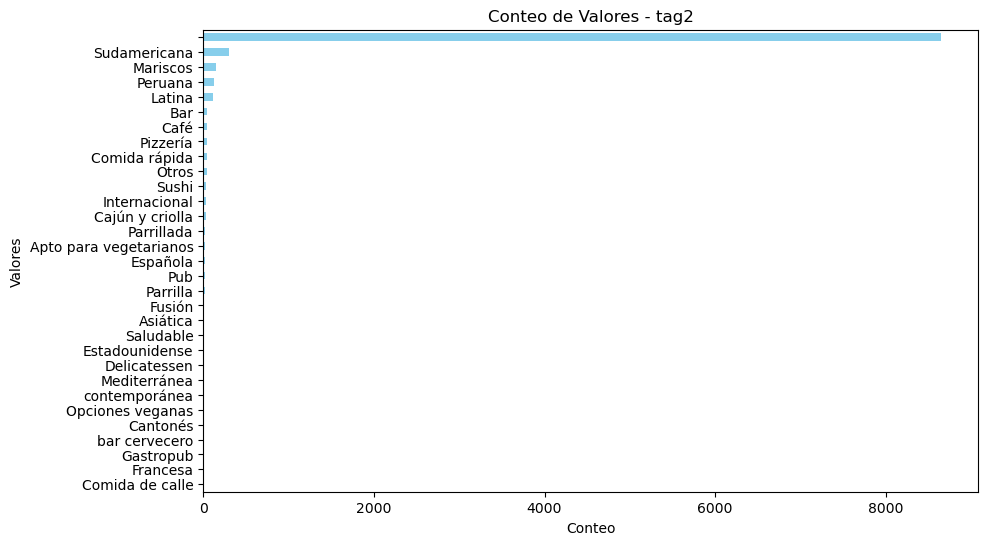

In [80]:
import matplotlib.pyplot as plt

# Obtener los valores de conteo
valorestag2 = df_final['tag2'].value_counts()

# Tomar los 15 primeros valores
top_152 = valorestag2.head(30)

# Sumar el resto
otros2 = valorestag2[30:].sum()

# Añadir el valor "Otros" a los 15 primeros valores
top_152['Otros'] = otros2

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
top_152.sort_values().plot(kind='barh', color='skyblue')
plt.title('Conteo de Valores - tag2')
plt.xlabel('Conteo')
plt.ylabel('Valores')
plt.show()

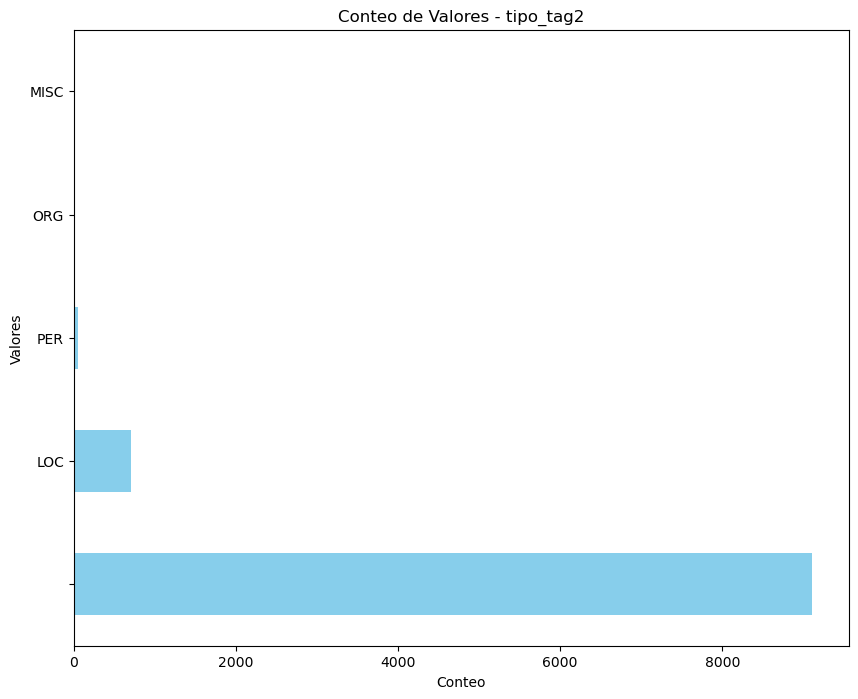

In [82]:
import matplotlib.pyplot as plt

# Obtener los valores de conteo
valorestipotag2 = df_final['tipo_tag2'].value_counts()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
valorestipotag2.plot(kind='barh', color='skyblue')
plt.title('Conteo de Valores - tipo_tag2')
plt.xlabel('Conteo')
plt.ylabel('Valores')
plt.show()

In [83]:
valorestag3 = df_final['tag3'].value_counts()
print(valorestag3)

tag3
                          9087
Sudamericana               236
Mariscos                    61
Española                    46
Fusión                      44
Apto para vegetarianos      43
Internacional               34
Pub                         28
Bar                         27
Café                        25
Comida rápida               24
Asiática                    21
Parrillada                  17
Saludable                   15
Latina                      15
Sushi                       14
Pizzería                    14
Parrilla                    13
Peruana                     12
Opciones veganas            11
Europea                     11
Mediterránea                10
Opciones sin gluten          6
Argentina                    5
Cantonés                     5
Del Medio Oriente            5
Gastropub                    5
Sopas                        5
Bar de vinos                 4
Fuente de soda               4
contemporánea                4
Cajún y criolla              4
Del

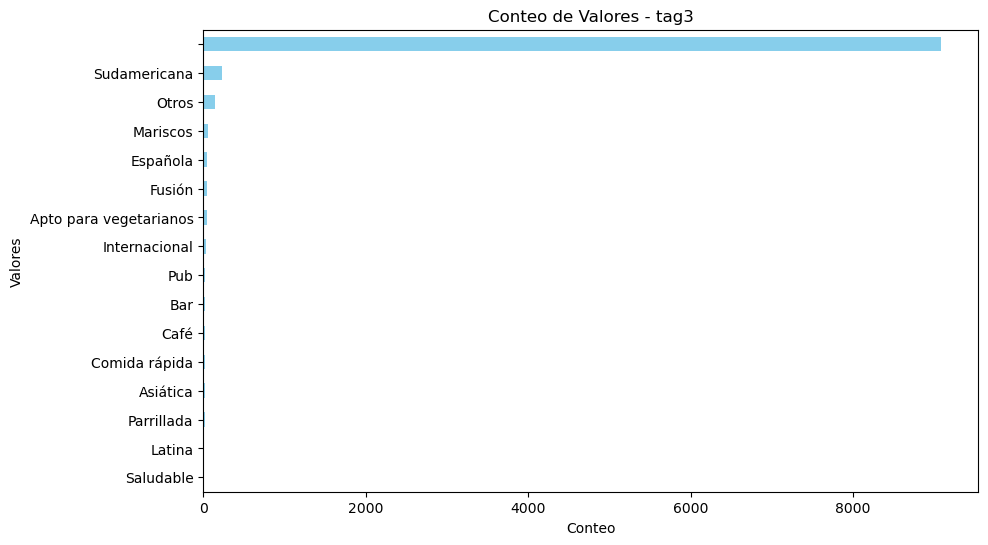

In [84]:
import matplotlib.pyplot as plt

# Obtener los valores de conteo
valorestag3 = df_final['tag3'].value_counts()

# Tomar los 15 primeros valores
top_153 = valorestag3.head(15)

# Sumar el resto
otros3 = valorestag3[15:].sum()

# Añadir el valor "Otros" a los 15 primeros valores
top_153['Otros'] = otros3

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
top_153.sort_values().plot(kind='barh', color='skyblue')
plt.title('Conteo de Valores - tag3')
plt.xlabel('Conteo')
plt.ylabel('Valores')
plt.show()

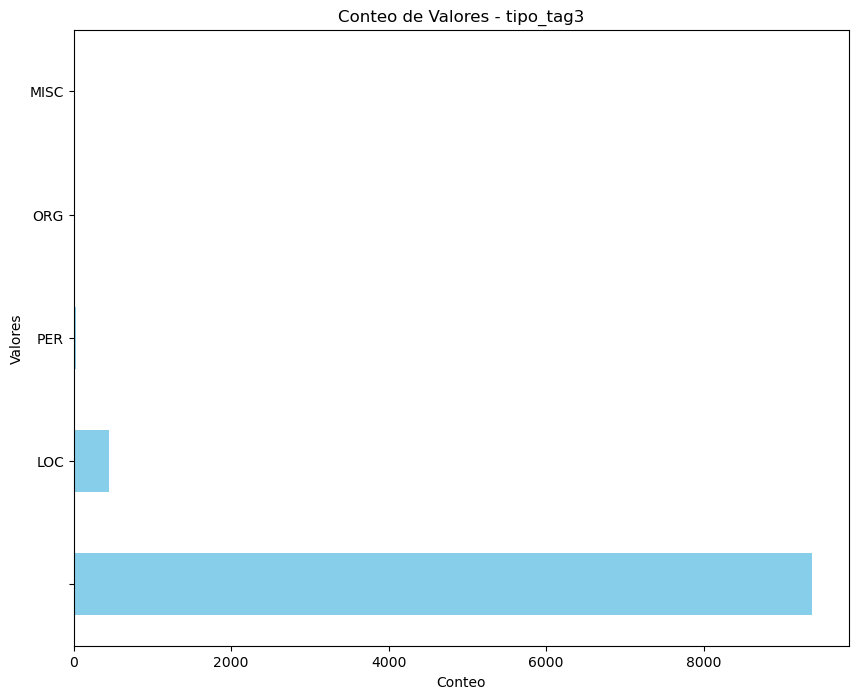

In [85]:
import matplotlib.pyplot as plt

# Obtener los valores de conteo
valorestipotag3 = df_final['tipo_tag3'].value_counts()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
valorestipotag3.plot(kind='barh', color='skyblue')
plt.title('Conteo de Valores - tipo_tag3')
plt.xlabel('Conteo')
plt.ylabel('Valores')
plt.show()

In [86]:
# Guardar el DataFrame en un archivo CSV
nombre_arc_final = './data/restaurantes_final.csv'
df_final.to_csv(nombre_arc_final, index=False, sep=',', decimal='.')